In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

In [4]:
import ssl

In [5]:
%config IPCompleter.greedy=True

In [6]:
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
events_data = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\event_data_train.zip')
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [8]:
submissions_data = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\submissions_data_train.zip')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [9]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [10]:
events_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [12]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [14]:
events_data['date'].min()

Timestamp('2015-06-15 04:00:48')

In [15]:
events_data['date'].max()

Timestamp('2018-05-19 23:33:31')

In [16]:
events_data['day'] = events_data['date'].dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [17]:
submissions_data['day'] = submissions_data['date'].dt.date

In [18]:
events_data.groupby('day')['user_id'].nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

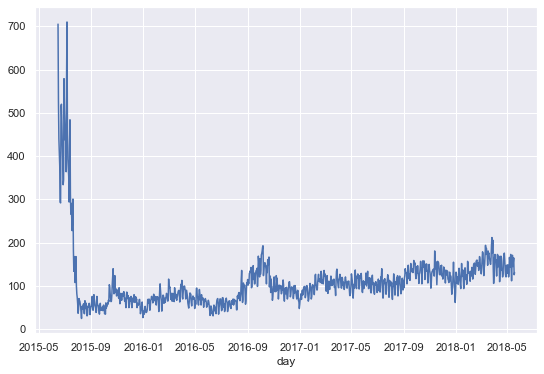

In [19]:
events_data.groupby('day')['user_id'].nunique().plot();

<AxesSubplot:>

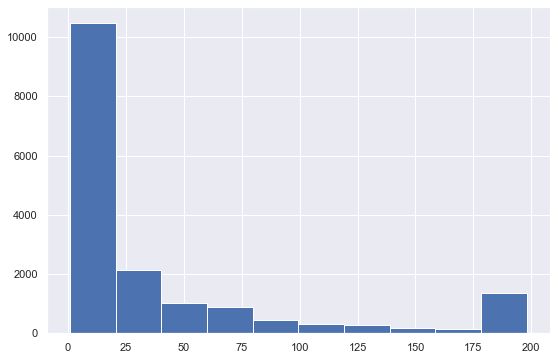

In [20]:
events_data[events_data['action'] == 'passed'] \
    .groupby('user_id',as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id':'passed_step'})['passed_step'].hist()

In [21]:
all_events = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

<AxesSubplot:>

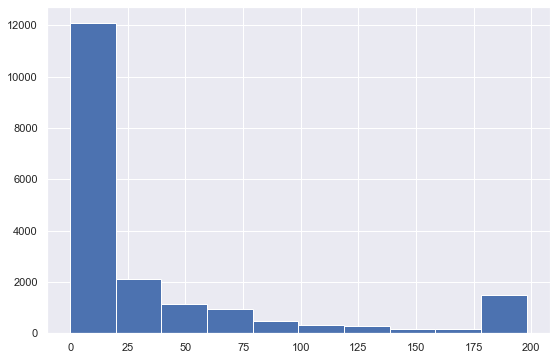

In [22]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()['discovered'].hist()

In [23]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [24]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [25]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [26]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [27]:
gap_date = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values
gap_date

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [28]:
gap_date = pd.Series(np.concatenate(gap_date, axis=0))
gap_date

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [29]:
gap_date = gap_date / (24*60*60)
gap_date

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

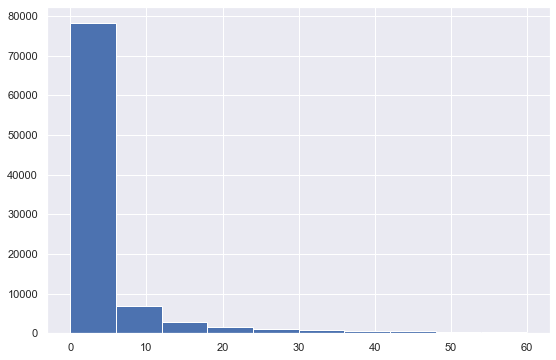

In [30]:
gap_date[gap_date < 60].hist()

In [31]:
gap_date.quantile(0.90)

18.325995370370403

In [32]:
gap_date.quantile(0.95)

59.760440972222156

In [33]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [34]:
all_events.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [35]:
users_scores[users_scores['wrong'] == 0]['correct']

0       2
12      3
14      2
17      2
30      9
       ..
9931    5
9932    2
9935    3
9936    1
9938    2
Name: correct, Length: 2175, dtype: int64

In [36]:
users_scores[users_scores['correct'] == 421]

submission_status,user_id,correct,wrong
439,1046,421,513


In [37]:
users_scores['correct'].max()

421

In [38]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [39]:
user_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp':'last_timestamp'})
user_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [40]:
now = user_data['last_timestamp'].max()
now

1526772811

In [41]:
dpor_out_threshold = 30 * 24 * 60 * 60


In [42]:
user_data['is_gone_user'] = (now - user_data['last_timestamp']) > dpor_out_threshold
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [43]:
user_data = user_data.merge(users_scores,on='user_id' ,how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [44]:
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [45]:
all_events.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [46]:
user_data = user_data.merge(all_events,on='user_id' ,how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [47]:
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [48]:
users_days = events_data.groupby('user_id')['day'].nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [49]:
user_data = user_data.merge(users_days,on='user_id' ,how='outer')
user_data = user_data.fillna(0)
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [50]:
user_data['user_id'].nunique()

19234

In [51]:
events_data['user_id'].nunique()

19234

In [52]:
user_data['passed_corse'] = user_data['passed'] > 170
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [53]:
user_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [54]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


<AxesSubplot:>

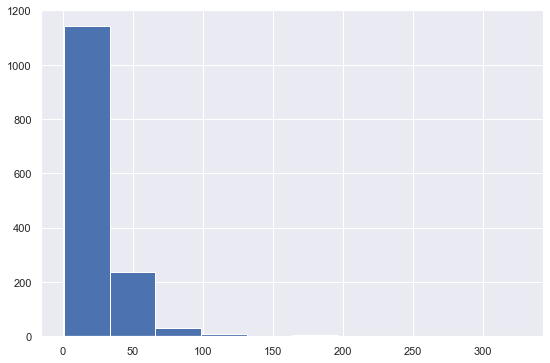

In [55]:
user_data[user_data['passed_corse']].day.hist()

In [56]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis =1)
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [57]:
user_data = user_data.merge(user_min_time, on='user_id', how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [58]:
events_data['user_time'] = events_data['user_id'].map(str) + '_' + events_data['timestamp'].map(str)
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [59]:
learning_time_threshold = 3 * 24 * 60 * 60
learning_time_threshold

259200

In [60]:
user_learning_time_threshold = user_min_time['user_id'].map(str) + '_' + (user_min_time['min_timestamp'] + learning_time_threshold).map(str)
user_learning_time_threshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [61]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold
user_min_time.head()

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


In [62]:
events_data = events_data.merge(user_min_time, on='user_id', how='outer')
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,min_timestamp,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048


In [63]:
events_data_train = events_data[events_data['user_time'] <= events_data['user_learning_time_threshold']]
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,min_timestamp,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048


In [64]:
# events_data['action'].unique()

In [65]:
# user_max_time = events_data.groupby('user_id', as_index=False) \
#     .agg({'timestamp': 'max'}) \
#     .rename({'timestamp': 'max_timestamp'}, axis =1)
# user_max_time.head()

In [66]:
# events_data = events_data.merge(user_max_time, on='user_id', how='outer')
# events_data.head()

In [67]:
# last_started_event = events_data[(events_data['timestamp'] == events_data['max_timestamp']) & (events_data['action'] == 'started_attempt')]
# last_started_event.head()

In [68]:
# last_started_event['step_id'].value_counts()

In [69]:
submissions_data_new = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\submissions_data_train.zip')
submissions_data_new.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [70]:
last_user_submit = submissions_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename({'timestamp': 'max_timestamp'}, axis =1)
last_user_submit.head()

,user_id,max_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601


In [71]:
submissions_data_new = submissions_data_new.merge(last_user_submit, on='user_id', how='outer')
submissions_data_new.head()

,step_id,timestamp,submission_status,user_id,max_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163


In [72]:
last_submissions_data = submissions_data_new[(submissions_data_new['timestamp'] == submissions_data_new['max_timestamp']) & (submissions_data_new['submission_status'] == 'wrong')]
last_submissions_data.head()

,step_id,timestamp,submission_status,user_id,max_timestamp
1696,33025,1436094981,wrong,18175,1436094981
5588,32173,1435303058,wrong,6053,1435303058
5848,33669,1436431976,wrong,13793,1436431976
6184,33350,1490785375,wrong,19739,1490785375
7332,32202,1492184437,wrong,17578,1492184437


In [73]:
last_submissions_data['step_id'].value_counts()

31978    154
32812    133
32031     97
32202     92
33481     78
        ... 
33684      1
33686      1
33674      1
32929      1
33676      1
Name: step_id, Length: 72, dtype: int64

In [74]:
events_data_train.groupby('user_id')['day'].nunique().max()

4

In [75]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [76]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,15853_1434348188,15853_1434605177
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,15853_1434347371,15853_1434605177


In [77]:
X = submissions_data_train.groupby('user_id')['day'].nunique().to_frame().reset_index()

In [78]:
X.head()

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [79]:
steps_tried = submissions_data_train.groupby('user_id')['step_id'].nunique().to_frame().reset_index().rename(columns={'step_id': 'steps_tried'})

In [80]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [84]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [85]:
X.rename(columns={'day': 'days'})

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [87]:
X = X.merge(submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index(), on='user_id', how='outer')


In [88]:
X.head()

,user_id,day,steps_tried,correct,wrong
0,2,1.0,2.0,2,0
1,3,1.0,4.0,29,23
2,8,1.0,11.0,9,21
3,14,1.0,1.0,0,1
4,16,3.0,23.0,77,106


In [89]:
X['correct_ratio'] = X['correct'] / (X['correct'] + X['wrong'])
X.head()

,user_id,day,steps_tried,correct,wrong,correct_ratio
0,2,1.0,2.0,2,0,1.000000
1,3,1.0,4.0,29,23,0.557692
2,8,1.0,11.0,9,21,0.300000
3,14,1.0,1.0,0,1,0.000000
4,16,3.0,23.0,77,106,0.420765


In [92]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_time,min_timestamp,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,1434340848,17632_1434600048
...,...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,1526762664,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,1526762664,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,1526772750,5198_1527031950


In [90]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()[['user_id', 'viewed']], on='user_id', how='outer')

KeyError: 'submission_status'

In [91]:
X.head()

,user_id,day,steps_tried,correct,wrong,correct_ratio
0,2,1.0,2.0,2,0,1.000000
1,3,1.0,4.0,29,23,0.557692
2,8,1.0,11.0,9,21,0.300000
3,14,1.0,1.0,0,1,0.000000
4,16,3.0,23.0,77,106,0.420765
